# Imports

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. Edge Detection

In [2]:
img = cv2.imread("car.jpg")

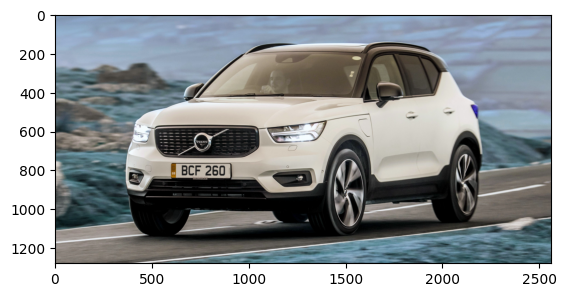

In [3]:
plt.imshow(img);

In [4]:
edges = cv2.Canny(img, 150, 200)

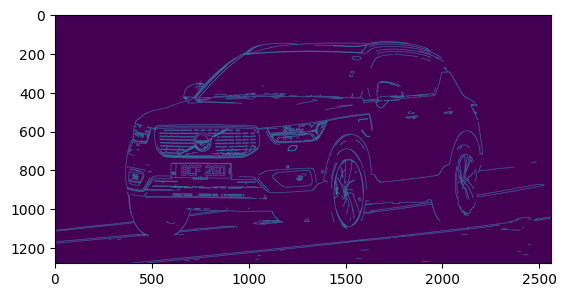

In [5]:
plt.imshow(edges);

# 2. Photo Sketching

In [6]:
# Image to Gray Image

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

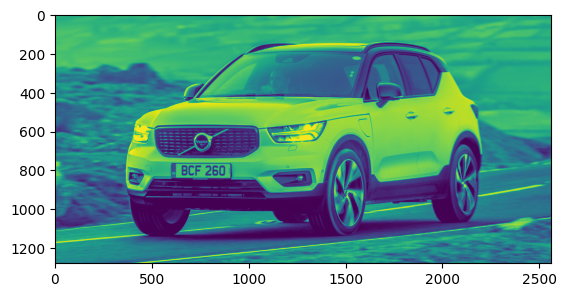

In [7]:
plt.imshow(gray_image);

In [8]:
# Gray Image to Inverted Gray Image

inverted_gray_image = 255-gray_image

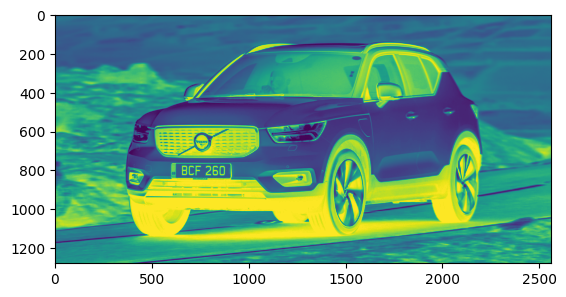

In [9]:
plt.imshow(inverted_gray_image);

In [10]:
# Blurring the Inverted Gray Image

blurred_inverted_gray_image = cv2.GaussianBlur(
    inverted_gray_image, (19, 19), 0)

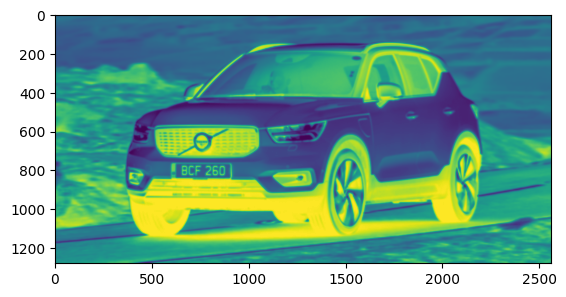

In [11]:
plt.imshow(blurred_inverted_gray_image);

In [12]:
# Inverting the Blurred Image

inverted_blurred_image = 255 - blurred_inverted_gray_image

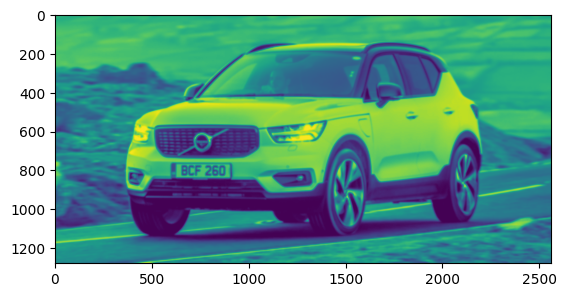

In [13]:
plt.imshow(inverted_blurred_image);

In [14]:
# Preparing Photo Sketching

sketch = cv2.divide(gray_image, inverted_blurred_image, scale=256.0)

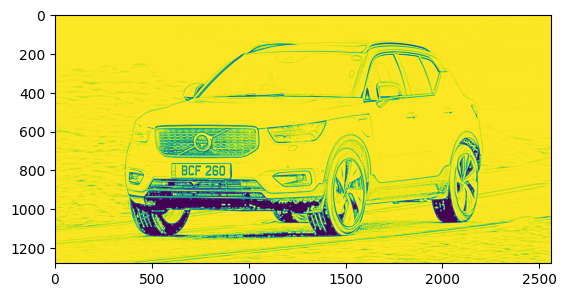

In [15]:
plt.imshow(sketch);

# 3. Face Detection

### Face Detection and Cropping Faces On An Image

In [16]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [17]:
img = cv2.imread("abba.png")

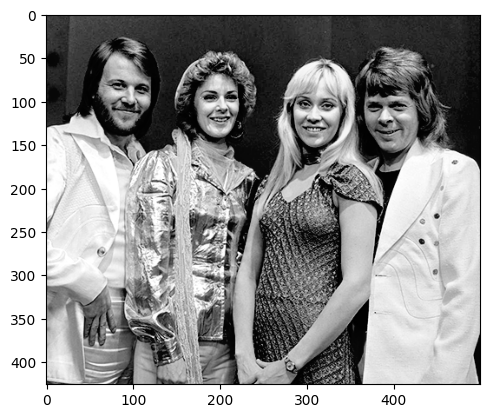

In [18]:
plt.imshow(img);

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

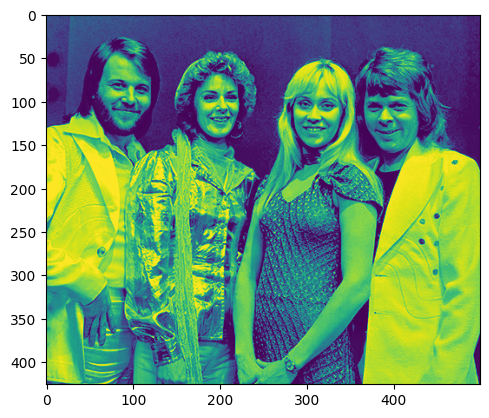

In [20]:
plt.imshow(gray);

In [21]:
faces = face_cascade.detectMultiScale(gray, 1.3, 4)

In [22]:
faces

array([[170,  71,  64,  64],
       [ 56,  54,  78,  78],
       [271,  74,  77,  77],
       [352,  76,  78,  78]])

In [23]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    crop_face = img[y:y+h, x:x+w]
    cv2.imwrite("crop_faces/"+str(y)+str(w)+str(h)+"_faces.jpg", crop_face)

In [24]:
cv2.imshow('img', img)
cv2.waitKey(0)

-1

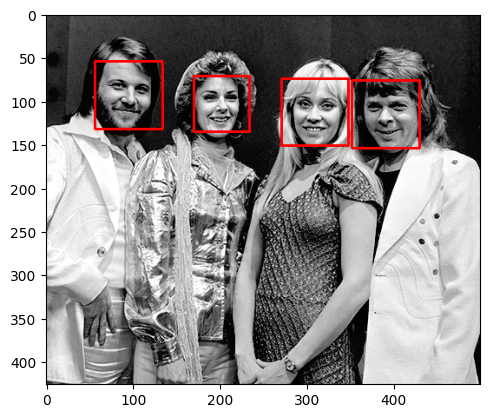

In [25]:
plt.imshow(img);

### Face Detection Using Camera or Video

In [26]:
# Load the cascade

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [27]:
# To capture video from webcam
cap = cv2.VideoCapture(0)

# To use a video file as input
#cap = cv2.VideoCapture('filename.mp4')

In [28]:
while True:
    # Read the frame
    _, img = cap.read()
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 4)
    
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
    # Display
    cv2.imshow('img', img)
    
    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k == 27:   # 27 = ESC key
        break
        
# Release the VideoCapture object
cap.release()
cv2.waitKey(0)  # without this the cv2 window hangs

-1

# 4. Shape Detection

In [31]:
img = cv2.imread('shapes.jpg')

In [37]:
img = img[:700, :, :]

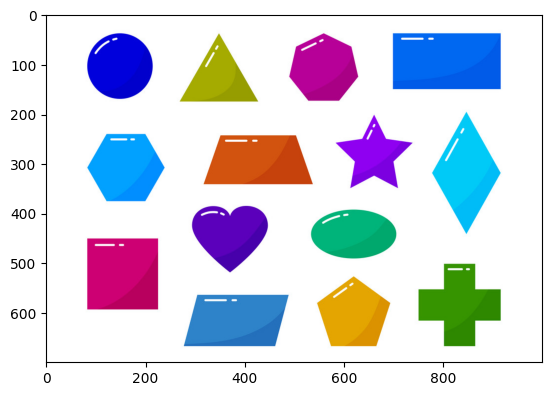

In [38]:
plt.imshow(img);

In [41]:
# Converting Image to grayscale

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

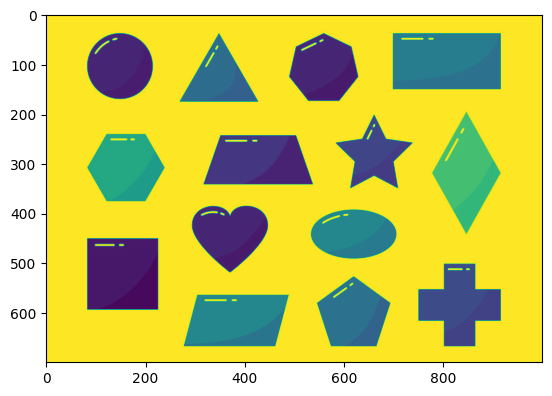

In [42]:
plt.imshow(gray);

In [43]:
# setting threshold of the gray image

_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

In [44]:
# Using a Contour Function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0
for contour in contours:
    # We will ignore the firstcontour because findcountor function detects whole image as a shape(contour)
    if i == 0:
        i = 1
        continue
        
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01*cv2.arcLength(contour, True), True
    )
    
    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
        
    # putting shape name at center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
        
    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 2)
        
    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
        
    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
    
    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 2)
        
# displaying the image after drawing contours
cv2.imshow('shapes', img)

cv2.waitKey(0)
cv2.destroyAllWindows()